In [33]:
import numpy as np
import matplotlib.pyplot as plt

def plot_rewards(rewards, title="Rewards Plot"):
    plt.figure(figsize=(8, 2))
    plt.scatter(range(len(rewards)), rewards, alpha=0.6, color='blue', edgecolor='k')  # Scatter plot
    plt.xlabel('Sample Index')
    plt.ylabel('Reward Value')
    plt.title(title)
   
    plt.grid(True)
    plt.show()

1. Sparsity of Rewards
Characteristic: In many real-world situations, rewards are sparse, meaning that only a small fraction of actions result in significant feedback (non-zero rewards).
Example: Online advertisements or click-through rates. Most users don't click on ads, so a recommendation engine needs to explore various combinations of ads to identify the few that actually generate clicks.
Why exploration matters: Since only a few actions yield rewards, exploring the space of actions helps find rare but valuable signals in the data.
Modeling: Sparse rewards can be modeled by generating feedback only under specific conditions (e.g., with a low probability of obtaining a non-zero reward).

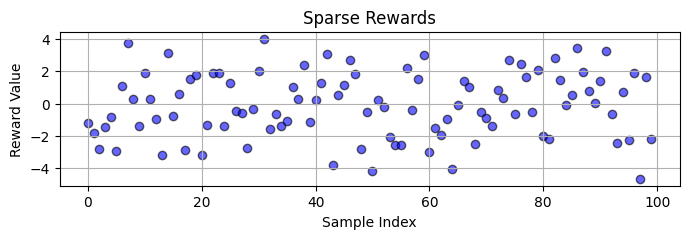

In [34]:
def generate_sparse_theta(dim, sparsity=0.1):
    theta = np.zeros(dim)
    non_zero_indices = np.random.choice(np.arange(dim), int(sparsity * dim), replace=False)
    theta[non_zero_indices] = np.random.randn(len(non_zero_indices))
    return theta

def sparse_rewards(X, theta_sparse, noise_std=0.1):
    return np.dot(X, theta_sparse) + np.random.normal(0, noise_std, size=X.shape[0])

# Example usage
dim = 20
X = np.random.randn(100, dim)
theta_sparse = generate_sparse_theta(dim)
rewards_sparse = sparse_rewards(X, theta_sparse)
plot_rewards(rewards_sparse, title="Sparse Rewards")

2. Non-Stationary Rewards
Characteristic: Rewards change over time due to evolving environments or user preferences, leading to a non-stationary reward structure.
Example: Recommendation systems (Netflix, Spotify) where user preferences drift over time as they discover new content or trends change.
Why exploration matters: Since the reward function drifts over time, exploring helps the system adapt to changes and prevents it from getting stuck in obsolete strategies.
Modeling: Rewards that change over time can be modeled using a reward function that introduces small shifts or drifts.

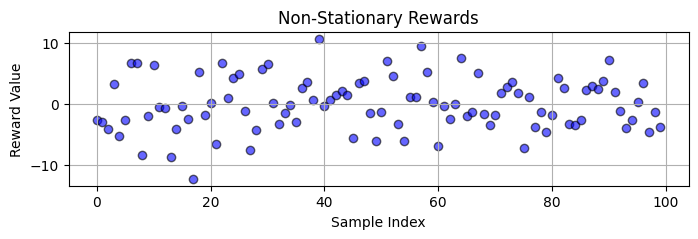

In [35]:
def non_stationary_theta(initial_theta, alpha, time):
    return initial_theta + alpha * time

def non_stationary_rewards(X, theta_initial, alpha, time, noise_std=0.1):
    theta_ns = non_stationary_theta(theta_initial, alpha, time)
    return np.dot(X, theta_ns) + np.random.normal(0, noise_std, size=X.shape[0])

# Example usage
theta_initial = np.random.randn(dim)
alpha = np.random.randn(dim) * 0.01
time = 50  # Assume current time is 50
rewards_ns = non_stationary_rewards(X, theta_initial, alpha, time)
plot_rewards(rewards_ns, title="Non-Stationary Rewards")

3. Noisy Rewards (High Variability)
Characteristic: Rewards are noisy, with significant variability in feedback for similar actions, making it harder to determine the best action without exploration.
Example: Financial markets or product launches, where returns or outcomes are highly uncertain due to unpredictable external factors.
Why exploration matters: When noise is high, it's crucial to explore various actions multiple times to differentiate between signal and noise.
Modeling: You can model noisy rewards by adding a substantial amount of randomness to the reward signal.

In [ ]:
def noisy_rewards(X, theta_noisy, noise_std=1.0):
    return np.dot(X, theta_noisy) + np.random.normal(0, noise_std, size=X.shape[0])

# Example usage
theta_noisy = np.random.randn(dim)
rewards_noisy = noisy_rewards(X, theta_noisy)
plot_rewards(rewards_noisy, title="Noisy Rewards ")

4. Context-Dependent Rewards (Complex Dependencies)
Characteristic: The rewards are heavily dependent on contextual information, meaning that different actions perform well in different contexts.
Example: Personalized medicine or targeted advertising, where treatments or ads work best for specific types of users but may be ineffective or harmful for others.
Why exploration matters: Since rewards vary across contexts, exploring a wide range of actions across different contexts helps uncover which actions work best in which scenarios.
Modeling: This can be represented by having different reward functions for each context

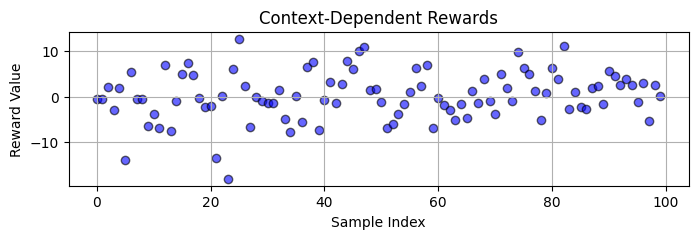

In [38]:
def sparse_action_rewards(X, theta_actions, action, noise_std=0.1):
    theta_action = theta_actions[action]  # Select theta for the given action
    return np.dot(X, theta_action) + np.random.normal(0, noise_std, size=X.shape[0])

# Example usage
theta_actions = np.random.randn(3, dim)  # 3 actions with different thetas
action = 0  # Chosen action
rewards_sparse_actions = sparse_action_rewards(X, theta_actions, action)
plot_rewards(rewards_sparse_actions, title="Context-Dependent Rewards")

5. Reward Saturation
Characteristic: Some actions exhibit diminishing returns, where repeated success with the same action yields lower incremental rewards over time.
Example: E-commerce recommendations, where continuously showing the same products to a user may lead to lower engagement, even if initially successful. Users get bored of seeing the same content.
Why exploration matters: The system needs to explore new actions to avoid hitting a plateau in performance, as repeating the same successful action indefinitely may lead to reduced returns.
Modeling: This can be modeled by reducing the reward for an action based on the number of times it has already been selected.

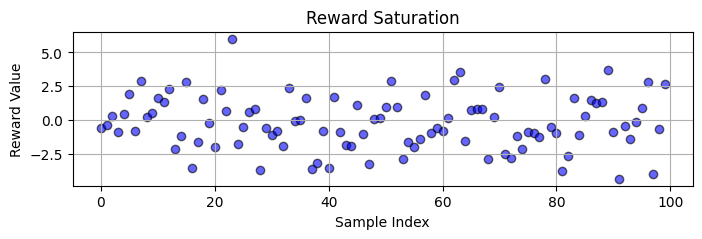

In [39]:
def saturated_rewards(X, theta_saturation, times_chosen, gamma=0.9, noise_std=0.1):
    base_reward = np.dot(X, theta_saturation)
    decay = gamma ** times_chosen
    return base_reward * decay + np.random.normal(0, noise_std, size=X.shape[0])

# Example usage
theta_saturation = np.random.randn(dim)
times_chosen = 5  # Assume action has been chosen 5 times
rewards_saturation = saturated_rewards(X, theta_saturation, times_chosen)
plot_rewards(rewards_saturation, title="Reward Saturation")

6. Heteroscedastic Rewards
Characteristic: Heteroscedasticity refers to the situation where the variability (variance) of rewards depends on the context or the action itself.
Example: Investments or financial products. Some financial products have inherently higher variance in returns than others, depending on market conditions.
Why exploration matters: Since the reward variance differs by action or context, the model must explore to learn not just the mean but also the variability of the rewards.
Modeling: You can model heteroscedasticity by making the reward variance depend on the context.

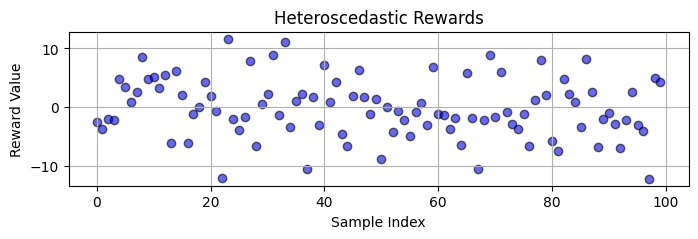

In [40]:
def heteroscedastic_rewards(X, theta_heteroscedastic, theta_var, noise_std=0.1):
    base_reward = np.dot(X, theta_heteroscedastic)
    context_variance = np.abs(np.dot(X, theta_var))
    return base_reward + np.random.normal(0, context_variance)

# Example usage
theta_heteroscedastic = np.random.randn(dim)
theta_var = np.random.randn(dim)  # Controls context-dependent variance
rewards_heteroscedastic = heteroscedastic_rewards(X, theta_heteroscedastic, theta_var)
plot_rewards(rewards_heteroscedastic, title="Heteroscedastic Rewards")

7. Time-Sensitive or Contextually Dynamic Rewards
Characteristic: Some rewards are time-sensitive or depend on external factors such as time of day, season, or specific events. Rewards might increase or decrease depending on these external factors.
Example: Retail discounts or seasonal product recommendations. Certain items may be highly popular or profitable only during specific times (e.g., Christmas trees in December, umbrellas during the rainy season).
Why exploration matters: Time-sensitive rewards force the system to continuously explore to adapt to changing trends or external conditions.
Modeling: You can introduce time-varying components or dynamic external factors that modulate rewards.

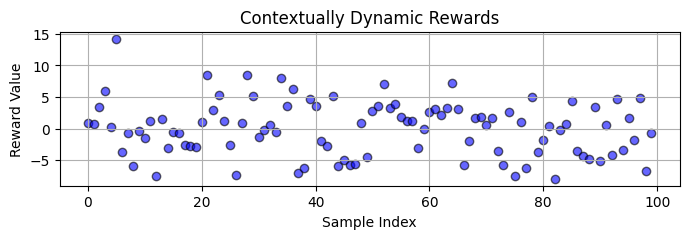

In [41]:
def time_sensitive_rewards(X, theta_time_sensitive, time, noise_std=0.1):
    time_factor = np.sin(2 * np.pi * time / 10)  # Example periodic function
    return np.dot(X, theta_time_sensitive) + time_factor + np.random.normal(0, noise_std, size=X.shape[0])

# Example usage
theta_time_sensitive = np.random.randn(dim)
time = 5  # Current time
rewards_time_sensitive = time_sensitive_rewards(X, theta_time_sensitive, time)
plot_rewards(rewards_time_sensitive , title="Contextually Dynamic Rewards")

8. Confounding or Dependent Actions
Characteristic: Some actions may be dependent on each other, such that choosing one action affects the reward probabilities of subsequent actions.
Example: Healthcare treatments where administering one treatment affects the effectiveness of others, or sequential marketing strategies where prior offers change future rewards.
Why exploration matters: Exploration helps determine how sequences of actions interact and influence future outcomes, uncovering the best action paths.
Modeling: Rewards can be modeled as dependent on the history of previous actions

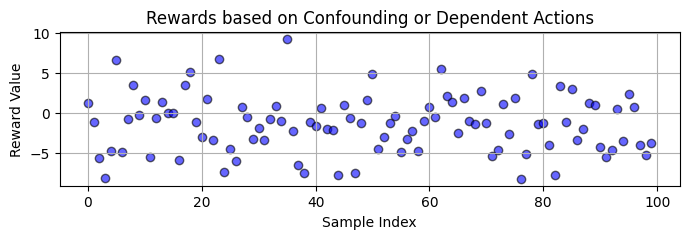

In [42]:
def dependent_rewards(X, theta_dependent, action_history_penalty, noise_std=0.1):
    base_reward = np.dot(X, theta_dependent)
    penalty = action_history_penalty
    return base_reward - penalty + np.random.normal(0, noise_std, size=X.shape[0])

# Example usage
theta_dependent = np.random.randn(dim)
action_history_penalty = 1.0  # Penalty for repeating actions
rewards_dependent = dependent_rewards(X, theta_dependent, action_history_penalty)
plot_rewards(rewards_dependent, title="Rewards based on Confounding or Dependent Actions")

9. Multi-Objective Rewards
Characteristic: In some cases, there are multiple objectives or competing reward signals, requiring a balance between them.
Example: Healthcare systems where patient outcomes and treatment costs both matter, or ad placements where click-through rate and brand safety are equally important.
Why exploration matters: Since the reward function balances competing objectives, exploration is necessary to find the best trade-off across different reward criteria.
Modeling: This can be simulated by having two or more reward functions and weighting them differently.

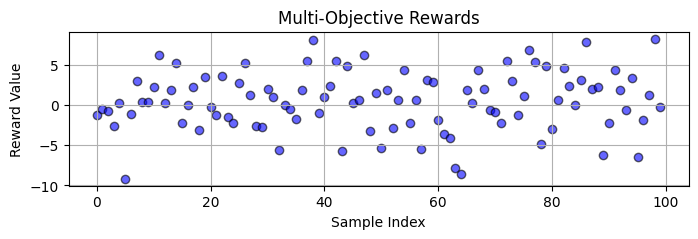

In [43]:
def multi_objective_rewards(X, theta_outcome, theta_cost, w1=0.5, w2=0.5, noise_std=0.1):
    outcome_reward = np.dot(X, theta_outcome)
    cost_reward = np.dot(X, theta_cost)
    return w1 * outcome_reward + w2 * cost_reward + np.random.normal(0, noise_std, size=X.shape[0])

# Example usage
theta_outcome = np.random.randn(dim)
theta_cost = np.random.randn(dim)
rewards_multi_objective = multi_objective_rewards(X, theta_outcome, theta_cost)
plot_rewards(rewards_multi_objective , title="Multi-Objective Rewards")